# Maximum Profile Validation

Here we consider maximum profiles generated by two sets of data in 08641. See the detail of construction starting from 01_07.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pytz
import os
import patsy #for spline regression
import scipy #for non-negative least square 
import scipy as sp 
from scipy import stats
from scipy.optimize import nnls
from numpy.linalg import inv #for matrix and statistics
import scipy as sp
import math
import statsmodels.api as sm
%matplotlib inline

In [2]:
#specify data source 
datasource = 'LocusEnergy'

In [3]:
zipcode = '08641'

In [4]:
#mainDir = 'C:/Users/umnouyp/Dropbox/Active/EnergyProject/Thesis/PVreadingsStudies/main'
#mainDir = 'C:/Users/Tee/Dropbox/Active/EnergyProject/Thesis/PVreadingsStudies/main'
mainDir = 'C:\Users\Admin\Dropbox\Active\EnergyProject\Thesis\PVreadingsStudies\main'
#we can choose which data to look at.
dataDir = mainDir + '/data/' + datasource +'/' + zipcode +'/'
outputDir = mainDir + '/output/'+ datasource +'/' + zipcode +'/'

In [5]:
#call fitted data from two set of data
data = pd.read_csv(dataDir +'/training_data_fitted_1.csv')
data['tsLocal'] = data['tsLocal'].map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
data1 = data

data = pd.read_csv(dataDir +'/training_data_fitted_2.csv')
data['tsLocal'] = data['tsLocal'].map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
data2 = data

In [8]:
data1.shape, data2.shape

((35442, 9), (35442, 9))

In [9]:
data1[:1]

,tsLocal,altitude,azimuth,power,numactivecomp,totalsize,s,DBW,mpower
0,2013-01-01 07:30:00,1.11014,-301.362934,NaN,3,38.830914,-0.999743,-355,0.15067


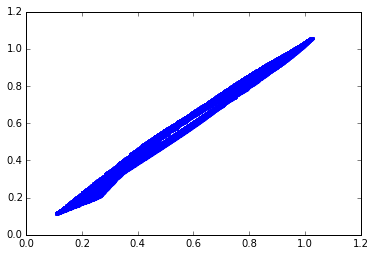

In [11]:
plt.plot(data1.mpower, data2.mpower,'.')

We can find the maximum and average difference between two maximum profiles:

In [13]:
np.max(np.absolute(data1.mpower-data2.mpower)),np.mean(np.absolute(data1.mpower-data2.mpower))

(0.066723019414076823, 0.021578673722570014)

That is, the maximum profile inherently gives error estimate of 0.02 p.u.